<a href="https://colab.research.google.com/github/illyesa/Bootcamp_GENAI_Fev2025/blob/main/DailyChallengeW3D4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

files.upload()

Saving train.csv to train.csv


{'train.csv': b'battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range\n842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1\n1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2\n563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2\n615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2\n1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1\n1859,0,0.5,1,3,0,22,0.7,164,1,7,1004,1654,1067,17,1,10,1,0,0,1\n1821,0,1.7,0,4,1,10,0.8,139,8,10,381,1018,3220,13,8,18,1,0,1,3\n1954,0,0.5,1,0,0,24,0.8,187,4,0,512,1149,700,16,3,5,1,1,1,0\n1445,1,0.5,0,0,0,53,0.7,174,7,14,386,836,1099,17,1,20,1,0,0,0\n509,1,0.6,1,2,1,9,0.1,93,5,15,1137,1224,513,19,10,12,1,0,0,0\n769,1,2.9,1,0,0,9,0.1,182,5,1,248,874,3946,5,2,7,0,0,0,3\n1520,1,2.2,0,5,1,33,0.5,177,8,18,151,1005,3826,14,9,13,1,1,1,3\n1815,0,2.8,0,2,0,33,0.6,159,4,17,607,748,1482,18,0,2,1,0,0,1\n803,1,

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis, ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("train.csv")
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [ ]:
missing_values = data.isnull().sum()
data.dtypes


,0
battery_power,int64
blue,int64
clock_speed,float64
dual_sim,int64
fc,int64
four_g,int64
int_memory,int64
m_dep,float64
mobile_wt,int64
n_cores,int64


In [ ]:
categorical_columns = ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']
unique_values = {col: data[col].unique() for col in categorical_columns}
mean_values = data.mean()
median_values = data.median()
mode_values = data.mode().iloc[0]
print(mean_values)
print(median_values)
print(mode_values)

range_values = data.max() - data.min()
variance_values = data.var()
std_dev_values = data.std()
print(range_values)
print(variance_values)
print(std_dev_values)

battery_power    1238.51850
blue                0.49500
clock_speed         1.52225
dual_sim            0.50950
fc                  4.30950
four_g              0.52150
int_memory         32.04650
m_dep               0.50175
mobile_wt         140.24900
n_cores             4.52050
pc                  9.91650
px_height         645.10800
px_width         1251.51550
ram              2124.21300
sc_h               12.30650
sc_w                5.76700
talk_time          11.01100
three_g             0.76150
touch_screen        0.50300
wifi                0.50700
price_range         1.50000
dtype: float64
battery_power    1226.0
blue                0.0
clock_speed         1.5
dual_sim            1.0
fc                  3.0
four_g              1.0
int_memory         32.0
m_dep               0.5
mobile_wt         141.0
n_cores             4.0
pc                 10.0
px_height         564.0
px_width         1247.0
ram              2146.5
sc_h               12.0
sc_w                5.0
talk_time    

In [ ]:
skewness_values = data.apply(skew)
kurtosis_values = data.apply(kurtosis)

In [ ]:
t_stat, p_value = ttest_ind(data[data['price_range'] == 0]['battery_power'],
                            data[data['price_range'] == 1]['battery_power'])
print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: -4.166132887458839
p-value: 3.366391080427631e-05


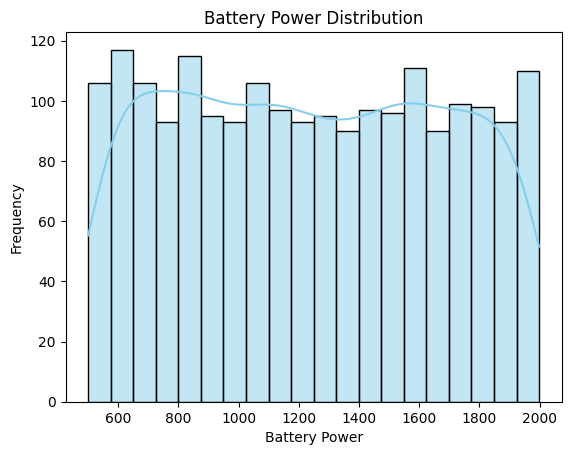

In [ ]:
sns.histplot(data['battery_power'], bins=20, kde=True, color='skyblue')
plt.title('Battery Power Distribution')
plt.xlabel('Battery Power')
plt.ylabel('Frequency')
plt.show()

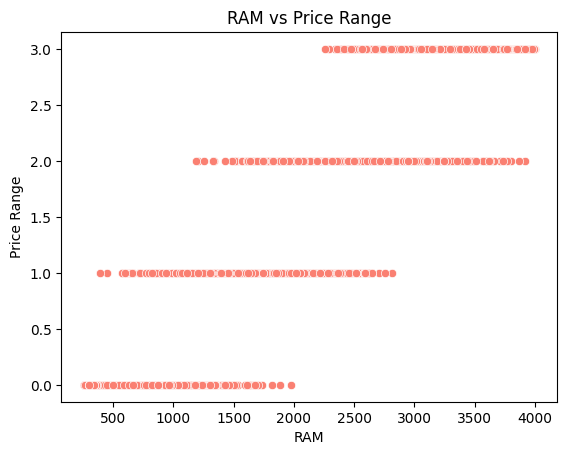

In [ ]:
sns.scatterplot(x='ram', y='price_range', data=data, color='salmon')
plt.title('RAM vs Price Range')
plt.xlabel('RAM')
plt.ylabel('Price Range')
plt.show()


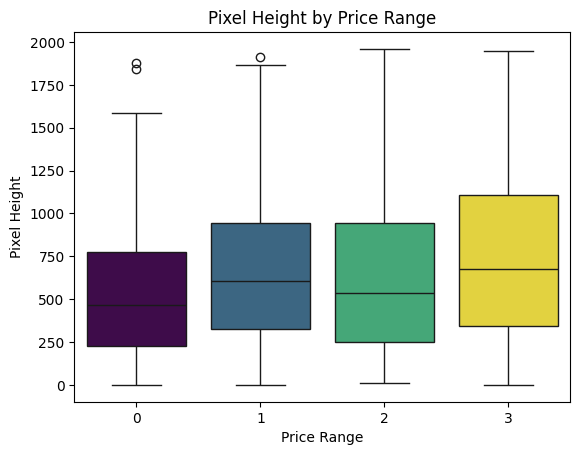

In [ ]:
sns.boxplot(x='price_range', y='px_height', hue='price_range', data=data, palette='viridis', legend=False)
plt.title('Pixel Height by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Pixel Height')
plt.show()


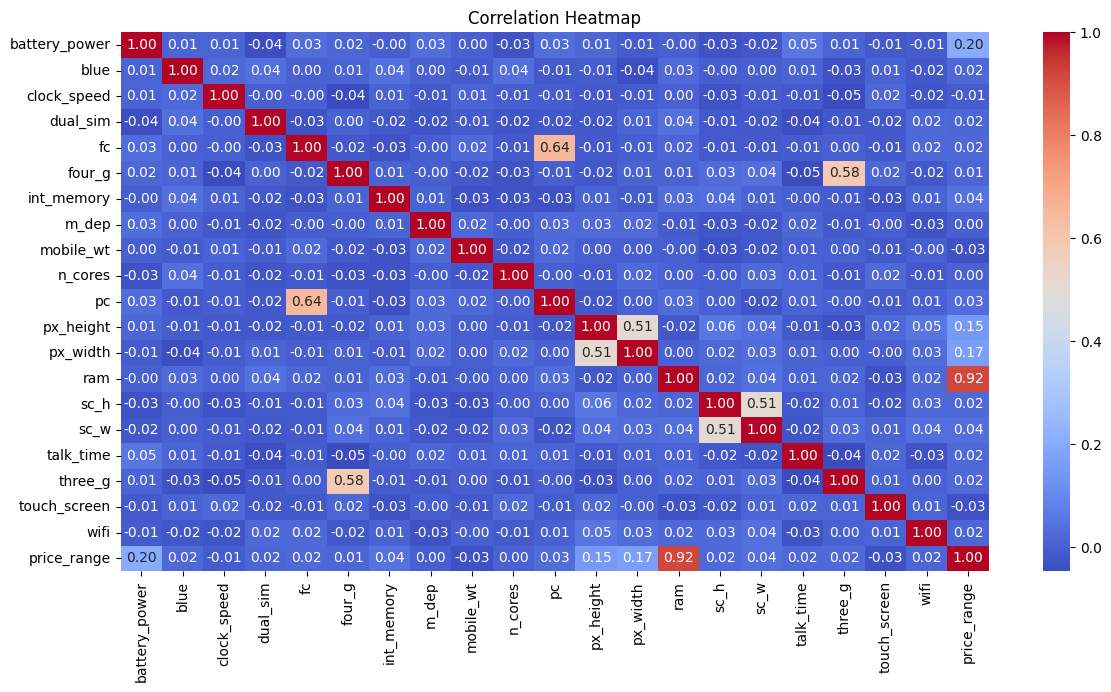

In [ ]:
plt.figure(figsize=(14, 7))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
